<a href="https://www.kaggle.com/code/egyfirst/k-nearest-evolution?scriptVersionId=127741756" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

     |████████████████████████████████| 9.2 MB 5.8 MB/s            
     |████████████████████████████████| 41 kB 401 kB/s             


In [3]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 12), reused 63 (delta 10), pack-reused 0
Unpacking objects: 100% (68/68), 20.59 MiB | 6.03 MiB/s, done.


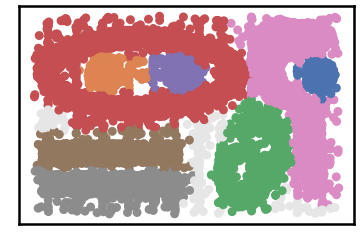

knn: 99  :: we detected 8 clusters:  :: pre-noise: 0 post_noise 148


In [4]:
data_path = 'datasets/denmune/chameleon/'  
chameleon_dataset = "t7.10k" #["t4.8k", "t5.8k", "t7.10k", "t8.8k"]

# train file
detected_clusers = []
noise_type1 = []
noise_type2 = []

data_file = data_path + chameleon_dataset + '.csv'
X_train = pd.read_csv(data_file, sep=',', header=None)

from IPython.display import clear_output
for knn in range (1, 100, 1):
    print ("knn", knn )
    clear_output(wait=True)
    dm = DenMune(train_data=X_train, k_nearest=knn, rgn_tsne=False )
    labels, validity = dm.fit_predict(show_analyzer=False)
    n_clusters = dm.analyzer['n_clusters']['detected']
    pre_noise = dm.analyzer['n_points']['noise']['type-1']
    post_noise = dm.analyzer['n_points']['noise']['type-2']
    detected_clusers.append([knn, n_clusters ])
    noise_type1.append([knn, pre_noise ])
    noise_type2.append([knn, post_noise ])
    
    print('knn:',knn ,  ' :: we detected', n_clusters, 'clusters:' , ' :: pre-noise:', pre_noise, 'post_noise', post_noise)
    time.sleep(0.2)
    

<Figure size 432x288 with 0 Axes>

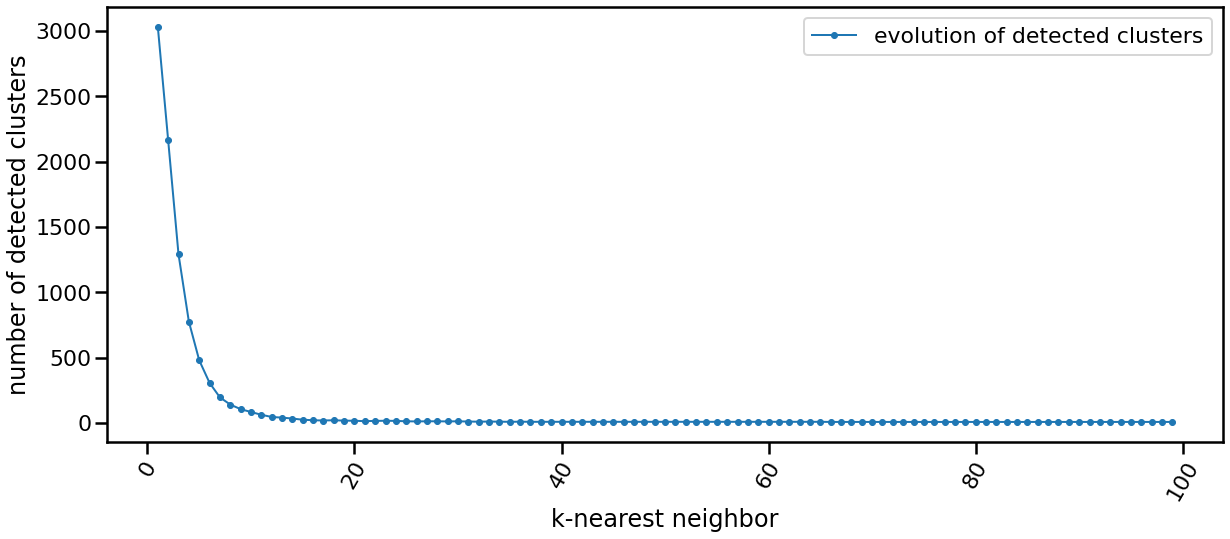

In [5]:
x, y = zip(*detected_clusers)
f1 = plt.figure(1)
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 8])
ax.plot(x, y, marker='.', linewidth=2, label='evolution of detected clusters')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbor')
ax.set_ylabel('number of detected clusters')
plt.legend()
plt.show()

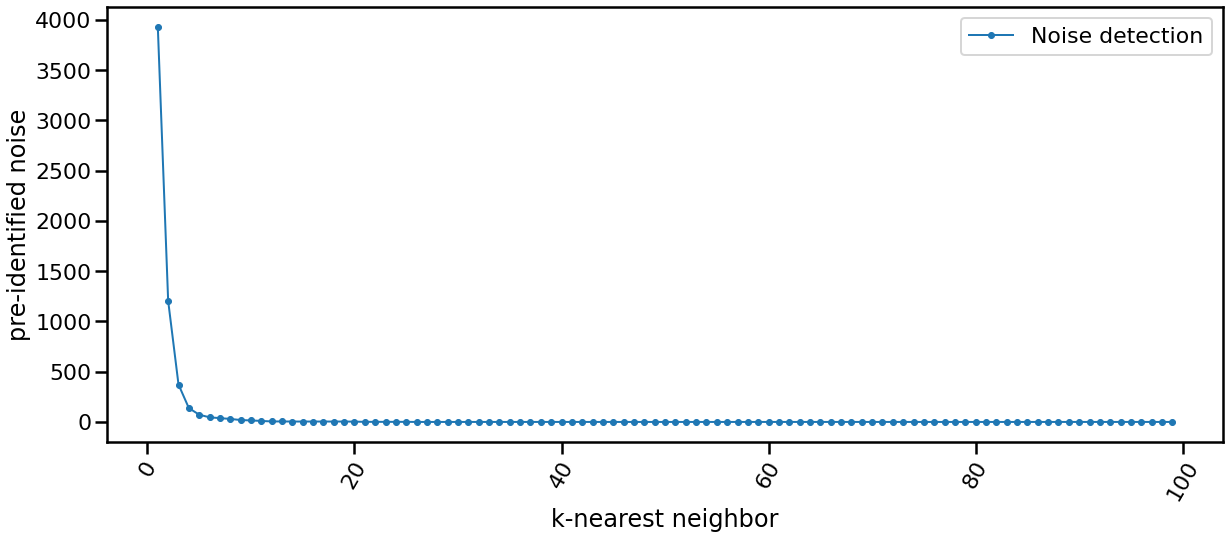

In [6]:
x, y = zip(*noise_type1)

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 8])
ax.plot(x, y, marker='.', linewidth=2, label='Noise detection')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbor')
ax.set_ylabel('pre-identified noise')
plt.legend()
plt.show()

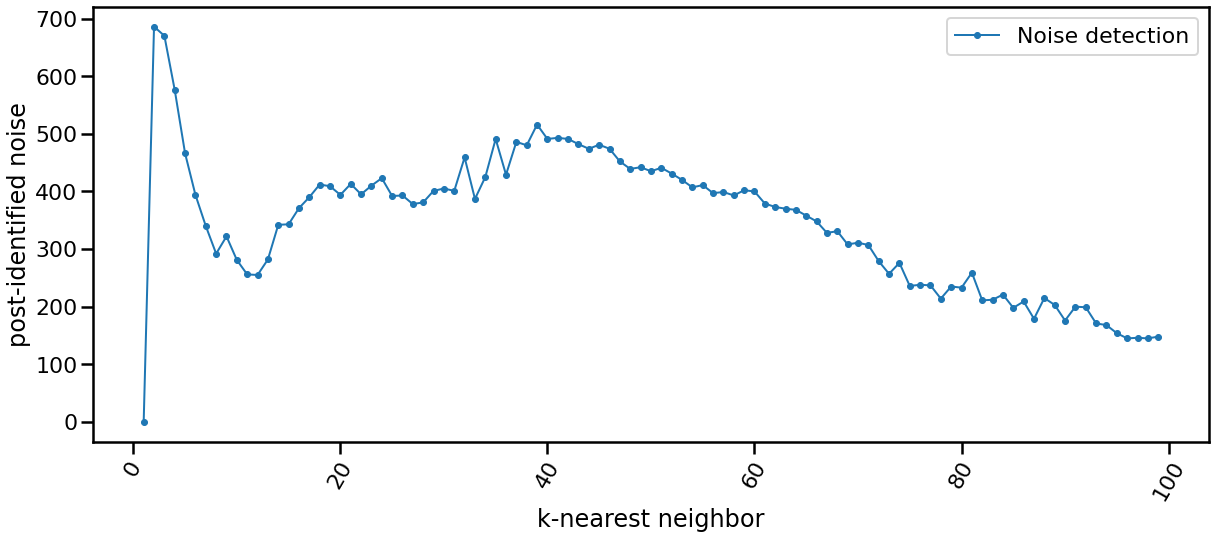

In [7]:
x, y = zip(*noise_type2)

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 8])
ax.plot(x, y, marker='.', linewidth=2, label='Noise detection')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbor')
ax.set_ylabel('post-identified noise')
plt.legend()
plt.show()

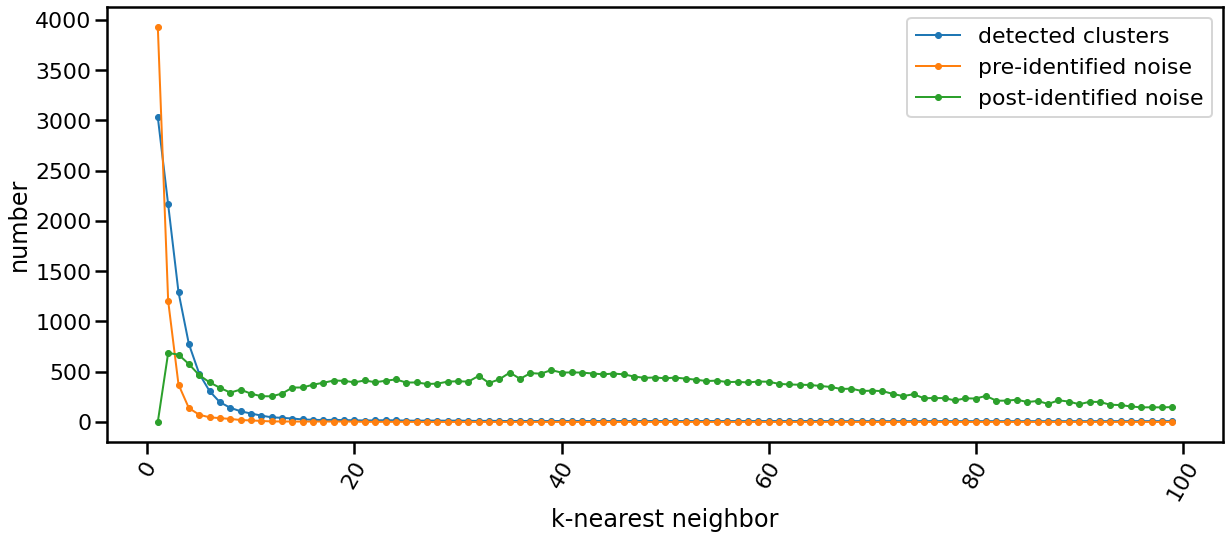

In [8]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 8])

x, y = zip(*detected_clusers)
ax.plot(x, y, marker='.', linewidth=2, label='detected clusters')

x, y = zip(*noise_type1)
ax.plot(x, y, marker='.', linewidth=2, label='pre-identified noise')

x, y = zip(*noise_type2)
ax.plot(x, y, marker='.', linewidth=2, label='post-identified noise')


plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbor')
ax.set_ylabel('number')
plt.legend()
plt.show()